# Lending-Club-Loan-Data

This **Project** is [Dataquest's](https://www.dataquest.io/course/machine-learning-project) Monthly Challenge for the month of October, 2016.

In this challenge, we are to explore using [past loan data from Lending Club](https://www.lendingclub.com/info/download-data.action) to build models that can predict if a loan will be paid off on time or not.

## Approach :

We are looking at the problem from the **conservative investor's** standpoint -- we are more interested in a low **False Positive Rate(FPR)** than a high **True Positive Rate(TPR)**


## Goal:

Construct a machine learning model that achieves a **TPR greater than 50%** while maintaining a **FPR less than 7%**.

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,12)

#pd.set_option('max_columns', 100) 
#pd.set_option('max_colwidth', 5000)
# from IPython.display import display
# max_columns, max_rows: Lần lượt là độ số lượng cột và số lượng dòng tối đa được hiển thị.
# max_colwidth: Quy định chiều rộng tối đa của một cột.

In [2]:
from IPython.display import display
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 5000

To start with, I will read into Pamdas the Lending Club loans data. This dataset contains **loans data from 2007-2011**.

**A quick comment about the loans data**:  This [Stanford University project report](http://cs229.stanford.edu/proj2015/199_report.pdf) mentions 'last_fico_range_high'(a column in the dataset) as the most predictive field of all the columns. However, the loans dataset that Lending Club makes available for downloads does not include some of this field. To get all the fields listed in their Data Dictionary, you may have to sign up.

In [3]:
# skip row 1 so pandas can parse the data properly.
loans_2007 = pd.read_csv('lending_club_loans.csv', low_memory=False) #skiprows=1, low_memory=False
half_count = len(loans_2007) / 2
loans_2007 = loans_2007.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
#loans_2007 = loans_2007.drop(['url','desc'],axis=1)      # Don't need these columns.


In [4]:
print(loans_2007.shape)
loans_2007.head()

(39786, 47)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,Oct-16,0.0,INDIVIDUAL,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Fully Paid,n,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,0.0,0.0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0


OKE

## Data Dictionary from Lending Club

This data dictionary explains what each column in the loans dataset represents.

In [5]:
data_dictionary = pd.read_csv('LCDataDictionary.csv')
print(data_dictionary.shape[0])
data_dictionary.columns.tolist()

117


['LoanStatNew', 'Description']

In [6]:
data_dictionary.head()

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


## Join the first row of loans_2007 and data_dictionary:
As mentioned on [Dataquest](https://www.dataquest.io/course/machine-learning-project), loans_2007 dataframe contains many columns(117), which can be cumbersome to try to explore all at once.

So I'll break up the columns into groups using the merged data_dictonary and first row of loans_2007 to understand what each column represent.

### Note:
   - The intent of exploring the columns at this stage is to filter out all fields in the loans dataset that will not be available when we're using the model on future loans.
    
   - Also, we want to discard any field which obviously has no effect on the target.

#origin
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name'})

loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes,columns=['dtypes'])
loans_2007_dtypes = loans_2007_dtypes.reset_index()
loans_2007_dtypes['name'] = loans_2007_dtypes['index']
loans_2007_dtypes = loans_2007_dtypes[['name','dtypes']]

### the column, first_value, contains values of first row in loans_2007
loans_2007_dtypes['first value'] = loans_2007.loc[0].values
preview = loans_2007_dtypes.merge(data_dictionary, on='name',how='left')

In [7]:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name'})
data_dictionary.head()

,name,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [8]:
loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes,columns=['dtypes'])
loans_2007_dtypes.head(5)

,dtypes
id,int64
member_id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64


In [9]:
loans_2007_dtypes = loans_2007_dtypes.reset_index()
loans_2007_dtypes.head(5)

,index,dtypes
0,id,int64
1,member_id,int64
2,loan_amnt,int64
3,funded_amnt,int64
4,funded_amnt_inv,float64


In [10]:
loans_2007_dtypes = loans_2007_dtypes.rename(columns={"index":"name"})
loans_2007_dtypes.head()

,name,dtypes
0,id,int64
1,member_id,int64
2,loan_amnt,int64
3,funded_amnt,int64
4,funded_amnt_inv,float64


In [11]:
# the column, first_value, contains values of first row in loans_2007
loans_2007_dtypes['first value'] = loans_2007.loc[0].values
loans_2007_dtypes.head(5)

,name,dtypes,first value
0,id,int64,1077501
1,member_id,int64,1296599
2,loan_amnt,int64,5000
3,funded_amnt,int64,5000
4,funded_amnt_inv,float64,4975.0


In [12]:
preview = loans_2007_dtypes.merge(data_dictionary, on='name',how='left')

### Please note:

 - The name field in preview dataframe contains the names of the columns in loans_2007.
    

In [13]:
preview.head()

,name,dtypes,first value,Description
0,id,int64,1077501,A unique LC assigned ID for the loan listing.
1,member_id,int64,1296599,A unique LC assigned Id for the borrower member.
2,loan_amnt,int64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,int64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for that loan at that point in time.


## FIRST GROUP OF COLUMNS:

In [14]:
preview[:25]

,name,dtypes,first value,Description
0,id,int64,1077501,A unique LC assigned ID for the loan listing.
1,member_id,int64,1296599,A unique LC assigned Id for the borrower member.
2,loan_amnt,int64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,int64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975.0,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


In [15]:
drop_list = ['id','member_id','funded_amnt','funded_amnt_inv','grade','sub_grade','issue_d']
loans_2007 = loans_2007.drop(drop_list,axis=1)
loans_2007.head(2)
#"['emp_title'] not found in axis"

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.0,0.00,Jan-15,171.62,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
1,2500,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.0,0.0,1014.530000,1014.53,456.46,435.17,0.0,122.9,1.11,Apr-13,119.66,Oct-16,0.0,INDIVIDUAL,0.0,0,0.0,0.0


**Notice** I didn't drop 'zip_code' field though we did drop on [Dataquest](https://www.dataquest.io/course/machine-learning-project). I will explain later, and you'll see why we need it.

## SECOND GROUP OF COLUMNS:

In [16]:
preview[25:50]

,name,dtypes,first value,Description
25,revol_bal,int64,13648,Total credit revolving balance
26,revol_util,object,83.70%,"Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit."
27,total_acc,int64,9,The total number of credit lines currently in the borrower's credit file
28,initial_list_status,object,f,"The initial listing status of the loan. Possible values are – W, F"
29,out_prncp,float64,0.0,Remaining outstanding principal for total amount funded
30,out_prncp_inv,float64,0.0,Remaining outstanding principal for portion of total amount funded by investors
31,total_pymnt,float64,5863.155187,Payments received to date for total amount funded
32,total_pymnt_inv,float64,5833.84,Payments received to date for portion of total amount funded by investors
33,total_rec_prncp,float64,5000.0,Principal received to date
34,total_rec_int,float64,863.16,Interest received to date


In [17]:
drop_cols = ['out_prncp','out_prncp_inv',
             'total_pymnt','total_pymnt_inv',
             'total_rec_prncp',
             'total_rec_int','total_rec_late_fee',
             'recoveries','collection_recovery_fee',
             'last_pymnt_d','last_pymnt_amnt']
loans_2007 = loans_2007.drop(drop_cols, axis=1)
loans_2007.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,application_type,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,Fully Paid,n,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
1,2500,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,Oct-16,0.0,INDIVIDUAL,0.0,0,0.0,0.0


## THIRD GROUP OF COLUMNS:

In [18]:
preview[50:]

,name,dtypes,first value,Description


In [19]:
# Nothing obvious to drop here

In [20]:
# Let's see number of columns we now have:
loans_2007.shape[1]

29

## TARGET COLUMN

I will use the **'loan_status'** field since it is the only column that directly describes if a loan was paid off on time, had delayed payments, or was defaulted on the borrower. -[Dataquest](https://www.dataquest.io/course/machine-learning-project)

Let's **explore the different values in 'loan_status'** column:

In [21]:
loans_2007.loan_status.value_counts()

loan_status
Fully Paid            34108
Charged Off            5662
Late (31-120 days)       10
Current                   3
Late (16-30 days)         1
In Grace Period           1
Default                   1
Name: count, dtype: int64

There are 7 unique values

## CLASSIFICATION

The goal here is to build a machine learning model that will predict who will pay off loan on time and who wil not. This will help avoid investing on risky borrower.

On [Dataquest](https://www.dataquest.io/course/machine-learning-project), we classified "Fully Paid" as positive and "Charged Off" as negative. I want to extend the negative net to include 'Late (31 -120 days)' and 'Default'. 



In [22]:
mapping_dict = {'loan_status':{'Fully Paid':1,'Charged Off': 0,'Late (31-120 days)': 0,'Default': 0}}
loans_2007 = loans_2007.replace(mapping_dict)
loans_2007 = loans_2007[(loans_2007['loan_status'] == 1) | (loans_2007['loan_status'] == 0)]

loans_2007.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,application_type,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,1,n,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
1,2500,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,0,n,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,Oct-16,0.0,INDIVIDUAL,0.0,0,0.0,0.0
2,2400,36 months,15.96%,84.33,10+ years,RENT,12252.0,Not Verified,1,n,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0
3,10000,36 months,13.49%,339.31,10+ years,RENT,49200.0,Source Verified,1,n,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,Apr-16,0.0,INDIVIDUAL,0.0,0,0.0,0.0
4,3000,60 months,12.69%,67.79,1 year,RENT,80000.0,Source Verified,1,n,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,Jan-17,0.0,INDIVIDUAL,0.0,0,0.0,0.0


In [23]:
loans_2007.shape

(39781, 29)

## Removing  Single  Value  Columns:

In [24]:
drop_columns = []

for col in loans_2007.columns:
    non_null = loans_2007[col].dropna()
    unique_non_null = non_null.unique()
    num_true_unique = len(unique_non_null)
    if num_true_unique < 2:
        drop_columns.append(col)
        
loans_2007 = loans_2007.drop(drop_columns, axis=1)
drop_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'application_type',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [25]:
for col in loans_2007.columns:
    if (len(loans_2007[col].unique()) < 4):
        print(loans_2007[col].value_counts())
        print()

term
 36 months    29096
 60 months    10685
Name: count, dtype: int64

verification_status
Not Verified       16924
Verified           12842
Source Verified    10015
Name: count, dtype: int64

loan_status
1    34108
0     5673
Name: count, dtype: int64



**Notice that** if any fields has two unique values but the one value has only few frequencies and so it is safe to consider as a single value column.

In [26]:
print(loans_2007.shape[1])
#loans_2007 = loans_2007.drop('pymnt_plan', axis=1)
loans_2007.shape[1]

22


22

# PREPARING  THE  FEATURES:



### Handling  Missing  Values

In [27]:
loans_2007.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
emp_length              1077
home_ownership             0
annual_inc                 0
verification_status        0
loan_status                0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_credit_pull_d         2
pub_rec_bankruptcies     697
dtype: int64

In [28]:
loans_2007 = loans_2007.drop(['pub_rec_bankruptcies'], axis=1)

In [29]:
print(loans_2007.dtypes)
loans_2007.head(2)

loan_amnt                int64
term                    object
int_rate                object
installment            float64
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
zip_code                object
addr_state              object
dti                    float64
delinq_2yrs              int64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_bal                int64
revol_util              object
total_acc                int64
last_credit_pull_d      object
dtype: object


,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d
0,5000,36 months,10.65%,162.87,10+ years,RENT,24000.0,Verified,1,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,Jan-17
1,2500,60 months,15.27%,59.83,< 1 year,RENT,30000.0,Source Verified,0,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,Oct-16




**Notice** these columns, 'int_rate' and 'revol_util' represent numeric values but are in text forms.
They need to be converted into float:

In [30]:
for col in ['int_rate','revol_util']:
    loans_2007[col] = loans_2007[col].str.rstrip('%').astype('float')

## TEXT COLUMNS

In [31]:
object_columns_df = loans_2007.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                    36 months
emp_length              10+ years
home_ownership               RENT
verification_status      Verified
loan_status                     1
zip_code                    860xx
addr_state                     AZ
earliest_cr_line           Jan-85
last_credit_pull_d         Jan-17
Name: 0, dtype: object


## Categorical  Columns

Let's explore the unique value counts of the columns that seem to contain categorical values

In [32]:
cols = ['home_ownership','verification_status','emp_length','term','addr_state']

for col in cols:
    print(loans_2007[col].value_counts())
    print()

home_ownership
RENT        18916
MORTGAGE    17700
OWN          3064
OTHER          98
NONE            3
Name: count, dtype: int64

verification_status
Not Verified       16924
Verified           12842
Source Verified    10015
Name: count, dtype: int64

emp_length
10+ years    8897
< 1 year     4589
2 years      4394
3 years      4098
4 years      3444
5 years      3286
1 year       3247
6 years      2231
7 years      1775
8 years      1484
9 years      1259
Name: count, dtype: int64

term
 36 months    29096
 60 months    10685
Name: count, dtype: int64

addr_state
CA    7105
NY    3817
FL    2872
TX    2734
NJ    1853
IL    1525
PA    1519
VA    1408
GA    1399
MA    1344
OH    1226
MD    1055
AZ     882
WA     842
CO     792
NC     788
CT     754
MI     722
MO     686
MN     616
NV     498
SC     472
WI     460
AL     452
OR     450
LA     436
KY     327
OK     300
KS     272
UT     259
AR     246
DC     214
RI     199
NM     189
WV     177
HI     174
NH     172
DE     114
MT      8

### ko có 2 cột này
for name in ['purpose','title']:
    print(loans_2007[name].value_counts())
    print()

In [33]:
mapping_dict = {
    'emp_length':{
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0,
        '': 0     #ko thay thế nan values bằng cách này được
    }
}

loans_2007 = loans_2007.drop(['last_credit_pull_d','addr_state','earliest_cr_line'], axis=1)
    
loans_2007 = loans_2007.replace(mapping_dict)

# replace NaN of emp_length with 0
loans_2007['emp_length'].fillna(0, inplace = True)
loans_2007.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,36 months,10.65,162.87,10.0,RENT,24000.0,Verified,1,860xx,27.65,0,1,3,0,13648,83.7,9
1,2500,60 months,15.27,59.83,0.0,RENT,30000.0,Source Verified,0,309xx,1.00,0,5,3,0,1687,9.4,4
2,2400,36 months,15.96,84.33,10.0,RENT,12252.0,Not Verified,1,606xx,8.72,0,2,2,0,2956,98.5,10
3,10000,36 months,13.49,339.31,10.0,RENT,49200.0,Source Verified,1,917xx,20.00,0,1,10,0,5598,21.0,37
4,3000,60 months,12.69,67.79,1.0,RENT,80000.0,Source Verified,1,972xx,17.94,0,0,15,0,27783,53.9,38


In [34]:
loans_2007.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_status             0
zip_code                0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util             50
total_acc               0
dtype: int64

## Dummy  Variables

In [35]:
cat_columns = ['home_ownership','verification_status','term']
dummy_df = pd.get_dummies(loans_2007[cat_columns])
loans_2007 = pd.concat([loans_2007, dummy_df], axis=1)
loans_2007 = loans_2007.drop(cat_columns, axis=1)
loans_2007.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,term_ 36 months,term_ 60 months
0,5000,10.65,162.87,10.0,24000.0,1,860xx,27.65,0,1,3,0,13648,83.7,9,False,False,False,False,True,False,False,True,True,False
1,2500,15.27,59.83,0.0,30000.0,0,309xx,1.00,0,5,3,0,1687,9.4,4,False,False,False,False,True,False,True,False,False,True
2,2400,15.96,84.33,10.0,12252.0,1,606xx,8.72,0,2,2,0,2956,98.5,10,False,False,False,False,True,True,False,False,True,False
3,10000,13.49,339.31,10.0,49200.0,1,917xx,20.00,0,1,10,0,5598,21.0,37,False,False,False,False,True,False,True,False,True,False
4,3000,12.69,67.79,1.0,80000.0,1,972xx,17.94,0,0,15,0,27783,53.9,38,False,False,False,False,True,False,True,False,False,True


In [36]:
loans_2007['zip_code'].unique()

array(['860xx', '309xx', '606xx', '917xx', '972xx', '852xx', '280xx',
       '900xx', '958xx', '774xx', '853xx', '913xx', '245xx', '951xx',
       '641xx', '921xx', '067xx', '890xx', '770xx', '335xx', '799xx',
       '605xx', '103xx', '150xx', '326xx', '564xx', '141xx', '080xx',
       '330xx', '974xx', '934xx', '405xx', '946xx', '445xx', '850xx',
       '604xx', '292xx', '088xx', '180xx', '029xx', '700xx', '010xx',
       '441xx', '104xx', '061xx', '616xx', '947xx', '914xx', '765xx',
       '980xx', '017xx', '752xx', '787xx', '077xx', '540xx', '225xx',
       '440xx', '437xx', '559xx', '912xx', '325xx', '300xx', '923xx',
       '352xx', '013xx', '146xx', '074xx', '786xx', '937xx', '331xx',
       '115xx', '191xx', '114xx', '908xx', '902xx', '992xx', '750xx',
       '950xx', '329xx', '226xx', '614xx', '802xx', '672xx', '083xx',
       '100xx', '926xx', '931xx', '712xx', '060xx', '707xx', '342xx',
       '895xx', '430xx', '919xx', '996xx', '891xx', '935xx', '801xx',
       '928xx', '233

In [37]:
loans_2007['zip_code'] = loans_2007['zip_code'].str.rstrip('x')
loans_2007['zip_code'].head()

0    860
1    309
2    606
3    917
4    972
Name: zip_code, dtype: object

In [38]:
loans_2007.to_csv('loans_2007_myself.csv', index=False)

In [39]:
filtered_loans2 = pd.read_csv('loans_2007_myself.csv',low_memory=False)
filtered_loans2.shape

(39781, 25)

In [40]:
filtered_loans = pd.read_csv('loans_2007.csv',low_memory=False)
filtered_loans.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,744.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,499.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2400.0,15.96,84.33,10,12252.0,1,606,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,719.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10000.0,13.49,339.31,10,49200.0,1,917,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,604.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5000.0,7.90,156.46,3,36000.0,1,852,11.20,0.0,734.0,3.0,9.0,0.0,7963.0,28.3,12.0,679.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [41]:
filtered_loans.shape

(39252, 41)

### Lý do có sự khác biệt giữa 25-41 columns (dù lúc đầu 47-56) do đã sử dụng biến giả, các cột category ko có ở tệp data của như purpose có tới 14 biến giả, có thể dùng WOE, One-hot-vector thay vì biến giả (numeric).

In [42]:
filtered_loans['zip_code']

0        860
1        309
2        606
3        917
4        852
        ... 
39247    802
39248    274
39249     17
39250    208
39251     27
Name: zip_code, Length: 39252, dtype: int64

In [43]:
def zip_formatted(row):
    if len(str(row)) == 1:
        row = str(row)+ '00'
    elif len(str(row)) == 2:
        row = str(row)+ '0'
    return int(row)
#nghĩa là vd zip_code = 2, thì thêm 00 thành 200, =15 thì thêm 0 thành 150, =368 thì giữ nguyên

In [44]:
filtered_loans['zip_code'] = filtered_loans['zip_code'].apply(zip_formatted)

In [45]:
filtered_loans['zip_code'].unique()

array([860, 309, 606, 917, 852, 280, 900, 958, 774, 853, 913, 245, 951,
       641, 921, 670, 890, 770, 335, 799, 605, 103, 150, 326, 564, 141,
       800, 974, 934, 405, 946, 445, 850, 292, 880, 180, 290, 700, 100,
       441, 104, 610, 616, 947, 914, 765, 980, 170, 972, 752, 787, 540,
       225, 440, 437, 559, 912, 325, 300, 923, 352, 130, 146, 740, 786,
       937, 331, 115, 191, 114, 908, 902, 750, 950, 329, 226, 992, 614,
       672, 830, 926, 931, 712, 600, 707, 342, 604, 895, 430, 919, 996,
       891, 935, 801, 928, 233, 927, 970, 211, 303, 194, 263, 403, 301,
       553, 993, 312, 432, 602, 216, 151, 971, 305, 334, 500, 129, 925,
       483, 760, 961, 200, 981, 330, 601, 117, 630, 920, 543, 775, 570,
       380, 221, 985, 113, 275, 236, 148, 450, 532, 729, 321, 959, 941,
       955, 217, 660, 620, 193, 857, 306, 271, 142, 956, 983, 945, 109,
       112, 802, 187, 435, 488, 287, 705, 592, 318, 549, 212, 347, 274,
       265, 785, 270, 813, 260, 201, 349, 322, 124, 940, 967, 11

In [46]:
filtered_loans.isnull().sum()

loan_amnt                               0
int_rate                                0
installment                             0
emp_length                              0
annual_inc                              0
loan_status                             0
zip_code                                0
dti                                     0
delinq_2yrs                             0
fico_range_high                         0
inq_last_6mths                          0
open_acc                                0
pub_rec                                 0
revol_bal                               0
revol_util                             50
total_acc                               0
last_fico_range_high                    0
home_ownership_MORTGAGE                 0
home_ownership_NONE                     0
home_ownership_OTHER                    0
home_ownership_OWN                      0
home_ownership_RENT                     0
verification_status_Not Verified        0
verification_status_Source Verifie

In [47]:
filtered_loans = filtered_loans.dropna()
print(filtered_loans.dtypes.value_counts())
print()
filtered_loans.isnull().sum()

float64    38
int64       3
Name: count, dtype: int64



loan_amnt                              0
int_rate                               0
installment                            0
emp_length                             0
annual_inc                             0
loan_status                            0
zip_code                               0
dti                                    0
delinq_2yrs                            0
fico_range_high                        0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
last_fico_range_high                   0
home_ownership_MORTGAGE                0
home_ownership_NONE                    0
home_ownership_OTHER                   0
home_ownership_OWN                     0
home_ownership_RENT                    0
verification_status_Not Verified       0
verification_status_Source Verified    0
verification_sta

In [48]:
#filtered_loans.to_csv('filtered_loans.csv',index=False)

# MAKING PREDICTIONS

**Now, the reason for zip_code inclusion in the prediction features**: I'm borrowing an idea from the [Stanford project report](http://cs229.stanford.edu/proj2015/199_report.pdf) - they reported using the zip_code to join this census data ["Median House- hold Income and Mean Household Income [2006-2010]"](http://www.psc.isr.umich.edu/dis/census/Features/tract2zip/). Here's a direct quote from the report explaining the use of census data:
    "... research like "The sensitivity of the loss given default rate to systematic risk" [4] has shown the link- age between default rate and macroeconomic factors, so we have decided to add in census data, with info like regional median income, to train our models on a more holistic set of features."
    
I will not join the census data to our loans data, instead will use just the zip_code to achieve the same results.

Also, I will start off with just the columns we used on Dataquest, which exclude 'last_fico_range_high' I mentioned earlier and the 'zip_code'. And, later include these fields.



In [49]:
loans = pd.read_csv('filtered_loans.csv',low_memory=False)
loans.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,744.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,499.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2400.0,15.96,84.33,10,12252.0,1,606,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,719.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,10000.0,13.49,339.31,10,49200.0,1,917,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,604.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5000.0,7.90,156.46,3,36000.0,1,852,11.20,0.0,734.0,3.0,9.0,0.0,7963.0,28.3,12.0,679.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [50]:
loans['zip_code'].unique()

array([860, 309, 606, 917, 852, 280, 900, 958, 774, 853, 913, 245, 951,
       641, 921, 670, 890, 770, 335, 799, 605, 103, 150, 326, 564, 141,
       800, 974, 934, 405, 946, 445, 850, 292, 880, 180, 290, 700, 100,
       441, 104, 610, 616, 947, 914, 765, 980, 170, 972, 752, 787, 540,
       225, 440, 437, 559, 912, 325, 300, 923, 352, 130, 146, 740, 786,
       937, 331, 115, 191, 114, 908, 902, 750, 950, 329, 226, 992, 614,
       672, 830, 926, 931, 712, 600, 707, 342, 604, 895, 430, 919, 996,
       891, 935, 801, 928, 233, 927, 970, 211, 303, 194, 263, 403, 301,
       553, 993, 312, 432, 602, 216, 151, 971, 305, 334, 500, 129, 925,
       483, 760, 961, 200, 981, 330, 601, 117, 630, 920, 543, 775, 570,
       380, 221, 985, 113, 275, 236, 148, 450, 532, 729, 321, 959, 941,
       955, 217, 660, 620, 193, 857, 306, 271, 142, 956, 983, 945, 109,
       112, 802, 187, 435, 488, 287, 705, 592, 318, 549, 212, 347, 274,
       265, 785, 270, 813, 260, 201, 349, 322, 124, 940, 967, 11

**Let's make sure** the loans DataFrame contains the right data types(numerics), and also has no null value before applying machine learning algorithms:

In [51]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39202 entries, 0 to 39201
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            39202 non-null  float64
 1   int_rate                             39202 non-null  float64
 2   installment                          39202 non-null  float64
 3   emp_length                           39202 non-null  int64  
 4   annual_inc                           39202 non-null  float64
 5   loan_status                          39202 non-null  int64  
 6   zip_code                             39202 non-null  int64  
 7   dti                                  39202 non-null  float64
 8   delinq_2yrs                          39202 non-null  float64
 9   fico_range_high                      39202 non-null  float64
 10  inq_last_6mths                       39202 non-null  float64
 11  open_acc                    

**Let's also** observe the frequency distribution of the unique values in the target column to help decide on the choice of **error metric**

In [52]:
loans['loan_status'].value_counts() / loans.shape[0]

loan_status
1    0.855875
0    0.144125
Name: count, dtype: float64

The value_counts shows a **significant class imbalance** in the target column - more than 85% of the loans were paid on time.

## Picking  An  Error  Metric And Handling The Class Imbalance


Since the **main goal** here is to construct a machine learning model that achieves a **TPR greater than 50%** while maintaining a **FPR less than 7%** ,it would be a terrible mistake to use just **accuracy** to measure model performance especially given such a high positive rate in the target column. Therefore, I'll not use **accuracy**   istead use metrics that tell us the number of **false positives** and **false negatives** -[Dataquest](https://www.dataquest.io/course/machine-learning-project).

In [53]:
def compute_metrics(predictions):
    
    predictions = pd.Series(predictions)
    # False positives
    fp_filter = (predictions == 1) & (loans['loan_status'] == 0)
    fp = len(predictions[fp_filter])
    
    # True positives
    tp_filter = (predictions == 1) & (loans['loan_status'] == 1)
    tp = len(predictions[tp_filter])
    
    # False negatives
    fn_filter = (predictions == 0) & (loans['loan_status'] == 1)
    fn = len(predictions[fn_filter])
    
    # True negatives
    tn_filter = (predictions == 0)& (loans['loan_status'] == 0)
    tn = len(predictions[tn_filter])
    
    # Rates
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    print(tpr * 100)
    print(fpr * 100)
    print()
    
    print('Other Mesurements:')
    
    
    sp = tn / (tn + fp)
    sty = tp / (tp + fn)
    G_mean = np.sqrt(sp * sty)
    prcn = tp / (tp + fp)
    acc = (tn + tp) / features.shape[0]
    method_dict = {'specificity': '{:.2f}'.format(sp*100), 
               'sensitivity': '{:.2f}'.format(sty*100), 
               'G-mean': '{:.2f}'.format(G_mean*100),
               'precision': '{:.2f}'.format(prcn*100), 
               'accuracy': '{:.2f}'.format(acc*100),
               'False Positive Rate': '{:.2f}'.format(fpr*100)
              }
    return pd.DataFrame(method_dict,index=['values'])

## Predictions without these columns:
    1. last_fico_range_high
    2. zip_code

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold

scaler = StandardScaler()

In [55]:
x_cols = loans.columns
features_cols = x_cols.drop(['loan_status','last_fico_range_high','zip_code']) # Dropping last_fico_range_high field
features = loans[features_cols]
target = loans['loan_status']

## Logistic Regression:

In [56]:
lr = LogisticRegression(random_state=0)
k_folds = KFold(n_splits = 10)

In [57]:
from sklearn.model_selection import KFold, cross_val_score

scores = cross_val_score(lr,features,target,cv = k_folds) 

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross Validation Scores:  [0.81815863 0.841367   0.8505102  0.84336735 0.86147959 0.87270408
 0.85816327 0.87346939 0.87755102 0.85892857]
Average CV Score:  0.8555699100604282
Number of CV Scores used in Average:  10


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
predictions = cross_val_predict(lr,features,target,cv = k_folds) 

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [59]:
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
# Let's compute performance:
metrics = compute_metrics(predictions)
metrics

99.9195278969957
99.73451327433628

Other Mesurements:


,specificity,sensitivity,G-mean,precision,accuracy,False Positive Rate
values,0.27,99.92,5.15,85.61,85.56,99.73


We can see from the table this model achieves 85.47 accuracy which misleadingly because while it does good job of predicting 99.98%(sensitivity) of the 1s, it's able to predict just 0.05%(specificity) of the 0s. This explains why **accuracy** cannot be relied on in this problem. Hence, we need to tell the Classifier to **penalize misclassifications of the less prevalent class more than the other class** -['Dataquest'](https://www.dataquest.io/course/machine-learning-project)

## Manual Penalties

In [61]:
penalty = {
    0: 13,
    1: 1
}

lr = LogisticRegression(class_weight=penalty, random_state= 1)
kf = KFold(n_splits= 10)

predictions = cross_val_predict(lr,features,target,cv=kf) 

# Let's compute performance:
metrics = compute_metrics(predictions)
metrics


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

11.209465903671912
3.9646017699115044

Other Mesurements:


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,specificity,sensitivity,G-mean,precision,accuracy,False Positive Rate
values,96.04,11.21,32.81,94.38,23.44,3.96


As you can see when I dropped the 'last_fico_range_high' and 'zip_code' fields the figures I got are approximately what we got on Dataquest - in the last mission.

Now, let's include thses fields and then move on:

## Predictions with these columns:
    1. last_fico_range_high
    2. zip_code

In [62]:
x_cols = loans.columns
features_cols = x_cols.drop(['loan_status'])
features = loans[features_cols]
target = loans['loan_status']

In [63]:
penalty = {
    0: 12,
    1: 1
}

lr = LogisticRegression(class_weight=penalty, random_state=1)
kf = KFold(n_splits= 10)

predictions = cross_val_predict(lr,features,target,cv=kf) 

# Let's compute performance:
metrics = compute_metrics(predictions)
metrics

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

70.57403433476395
9.946902654867257

Other Mesurements:


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,specificity,sensitivity,G-mean,precision,accuracy,False Positive Rate
values,90.05,70.57,79.72,97.68,73.38,9.95


**Notice** the significant increase in performance with regard to our **tpr** and **fpr** when I included the 'last_fico_range_high', in particular.
This should be expected since a borrower's recent credit score encompass all the other fields with exception of 'purpose' field which is rendered as dummy variables. I think the same idea can be extended to the 'zip_code' field. The project report mentioned above suggest a link between macroeconomic factors such as regional median income, mean income, population, and the likelihood of a borrower defaulting on a loan. If this assumption is plausible then, just as a credit score can hold many other factors, so can zip code represents all macroeconomic indexes of an area.
By way, I downloaded the ["Median House- hold Income and Mean Household Income [2006-2010]"](http://www.psc.isr.umich.edu/dis/census/Features/tract2zip/), experimented with it and came to this conclusion. 

## Debugging  Algorithms  With Grid Search , Feature Selection  And Learning Curves

Now, let's  see **how performance can be improved**. This book, [Python Data Science Essentials](https://www.amazon.com/Python-Data-Science-Essentials-fundamentals/dp/1785280422), proved to be resourceful at this stage.

## Determine The Best Parameters  With GridSearchCV:

In [65]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [66]:
penalty = {
    0: 14,
    1: 1
}

pipe = make_pipeline(LogisticRegression(class_weight=penalty))
C_range = 10.**np.arange(-2, 3)
penalty_options = ['l1','l2']
param_grid = dict(logisticregression__C=C_range, logisticregression__penalty=penalty_options)
grid = GridSearchCV(pipe, param_grid, cv=10, scoring='roc_auc')
grid.fit(features, target)
grid.best_score_

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

0.8831852757827232

In [67]:
grid.best_params_   # Print best parameters for the logistic model

{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}

## Determine Feature Importance:

In [68]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

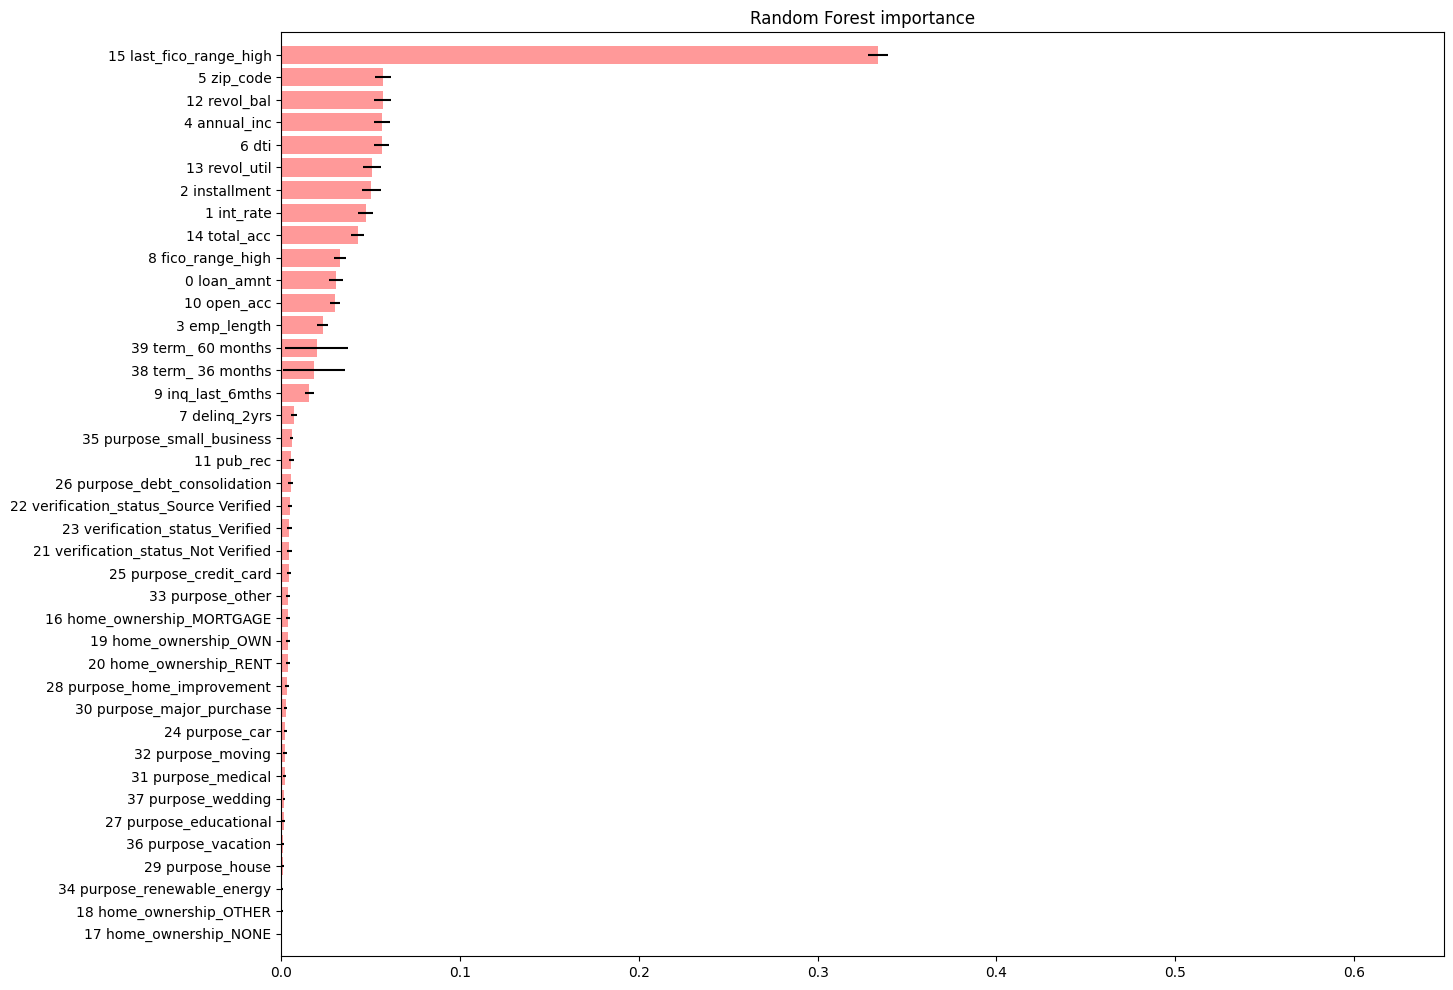

In [69]:
RF = RandomForestRegressor(n_estimators=100, random_state=1).fit(features,target)



feature_names = np.array([' '.join([str(b), a]) for a,b in
zip(features.columns,range(len(features.columns)))])


importance = np.mean([tree.feature_importances_ for tree in RF.estimators_],axis=0)
std = np.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices = np.argsort(importance)
range_ = range(len(importance))
plt.figure()
plt.title("Random Forest importance")

plt.barh(range_,importance[indices], color="r", xerr=std[indices], alpha=0.4, align="center")

plt.yticks(range(len(importance)), feature_names[indices])
plt.ylim([-1, len(importance)])
plt.xlim([0.0, 0.65])
plt.show()

The plot indicates 'last_fico_range_high' as the most predictive field followed by the 'zip_code' field.

Note: some field appeared as important but may have a negative effect on the model's specificity and sensitivity. Let's check some of these features relationship with the prediction results - is it positive or negative.

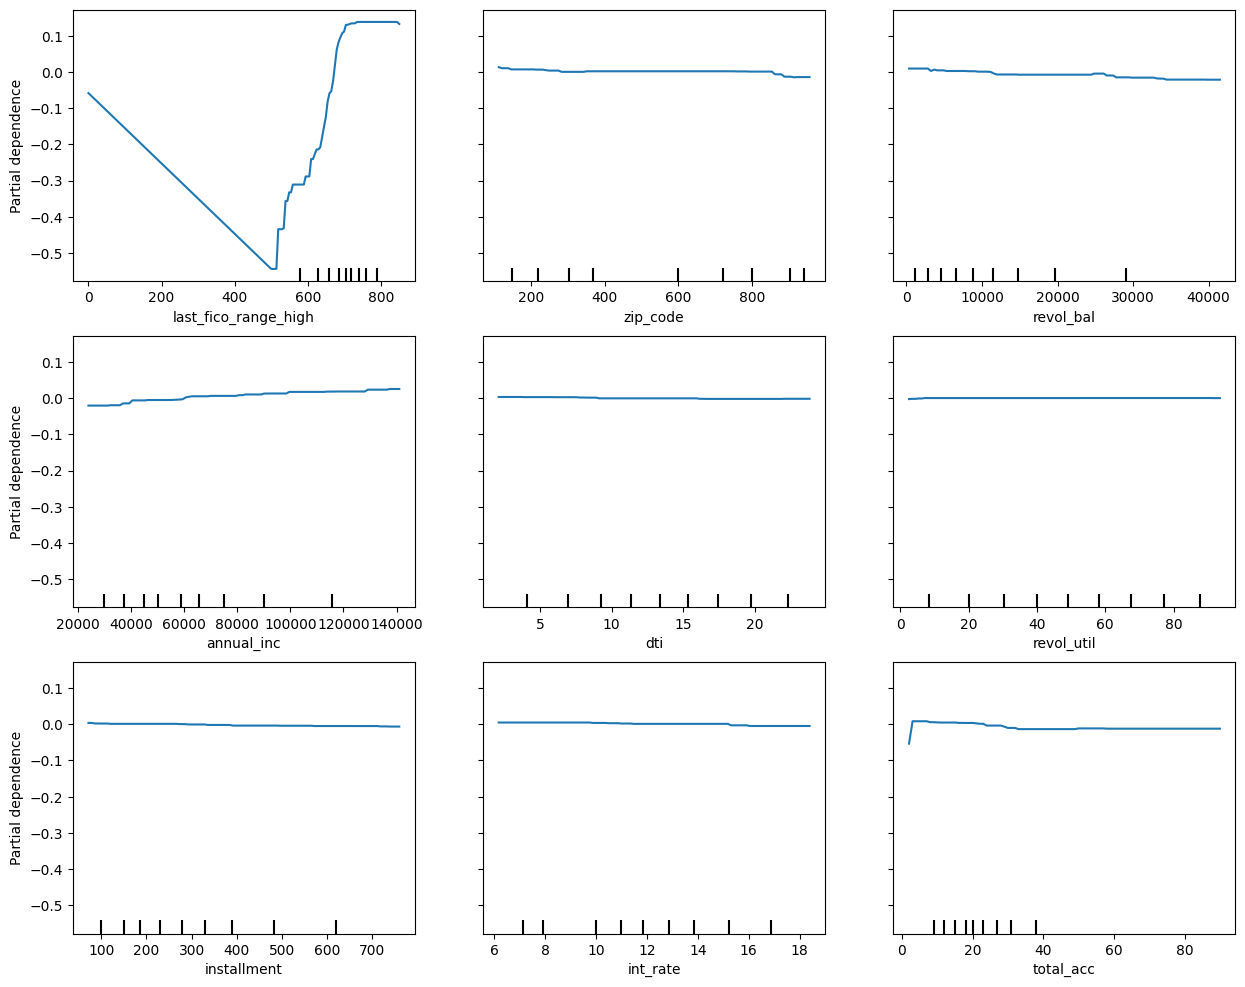

In [70]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import GradientBoostingRegressor
GBM = GradientBoostingRegressor(n_estimators=100,random_state=1).fit(features, target)
feature = [15,5,12,4,6,13,2,1,14]

PartialDependenceDisplay.from_estimator(GBM, features, feature)

With these revelations, let's back to the models:

In [71]:
features = loans[['last_fico_range_high','total_acc','annual_inc','loan_amnt','zip_code']]
target = loans['loan_status']

In [72]:
features.columns.tolist()

['last_fico_range_high', 'total_acc', 'annual_inc', 'loan_amnt', 'zip_code']

## Logistic  Regression

In [79]:
penalty = {
    0: 12,
    1: 1
}

lr = LogisticRegression(C=0.01,penalty='l2',class_weight=penalty, random_state=1)
kf = KFold(n_splits= 10)

predictions = cross_val_predict(lr,features,target,cv=kf) 

# Let's compute performance:
metrics = compute_metrics(predictions)
metrics

24.91654744873629
14.265486725663717

Other Mesurements:


,specificity,sensitivity,G-mean,precision,accuracy,False Positive Rate
values,85.73,24.92,46.22,91.21,33.68,14.27


### Let's experiment with just 'last_fico_range_high':

In [78]:
penalty = {
    0: 12,
    1: 1
}

lr = LogisticRegression(C=1,penalty='l2',class_weight=penalty)
kf = KFold(n_splits= 10)

predictions = cross_val_predict(lr,features[['last_fico_range_high']],target,cv=kf) 

# Let's compute performance:
metrics = compute_metrics(predictions)
metrics

72.8063900810682
6.867256637168142

Other Mesurements:


,specificity,sensitivity,G-mean,precision,accuracy,False Positive Rate
values,93.13,72.81,82.34,98.44,75.74,6.87


## Random Forest
**Random Forest** does well with just **last_fico_range_high** field.

In [81]:
penalty = {
    0: 12,
    1: 1
}

rf = RandomForestClassifier(random_state=1,class_weight=penalty)
kf = KFold(n_splits= 10)

predictions = cross_val_predict(rf, features[['last_fico_range_high']],target,cv=kf)


# Let's compute performance:
metrics = compute_metrics(predictions)
metrics

71.52181688125894
6.513274336283185

Other Mesurements:


,specificity,sensitivity,G-mean,precision,accuracy,False Positive Rate
values,93.49,71.52,81.77,98.49,74.69,6.51


## Logistic  Regression With Higher Manual Penalty:

In [83]:
penalty = {
    0: 13,
    1: 1
}

lr = LogisticRegression(C=1.0,penalty='l2',class_weight=penalty)
kf = KFold(n_splits= 10)

X = scaler.fit_transform(features)

predictions = cross_val_predict(lr,X,target,cv=kf) 

# Let's compute performance:
metrics = compute_metrics(predictions)
metrics

71.6618979494516
6.035398230088496

Other Mesurements:


,specificity,sensitivity,G-mean,precision,accuracy,False Positive Rate
values,93.96,71.66,82.06,98.60,74.88,6.04


In [86]:
penalty = {
    0: 15,
    1: 1
}

lr = LogisticRegression(C=100.0,penalty='l2',class_weight=penalty, random_state=1)
kf = KFold(n_splits= 10)

predictions = cross_val_predict(lr,features,target,cv=kf) 

# Let's compute performance:
metrics = compute_metrics(predictions)
metrics

12.905340963280878
6.991150442477877

Other Mesurements:


,specificity,sensitivity,G-mean,precision,accuracy,False Positive Rate
values,93.01,12.91,34.65,91.64,24.45,6.99


##  The Logistic Model  Learning Curve:

In [88]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDClassifier

In [90]:
penalty = {
    0: 12,
    1: 1
}
lr = LogisticRegression(C=0.01,penalty='l2',class_weight=penalty)


train_size,train_scores,test_scores = learning_curve(lr,features,target,train_sizes=np.linspace(.01,1.0,5),cv=10,
                                                    scoring='roc_auc',exploit_incremental_learning=False,n_jobs=-1)

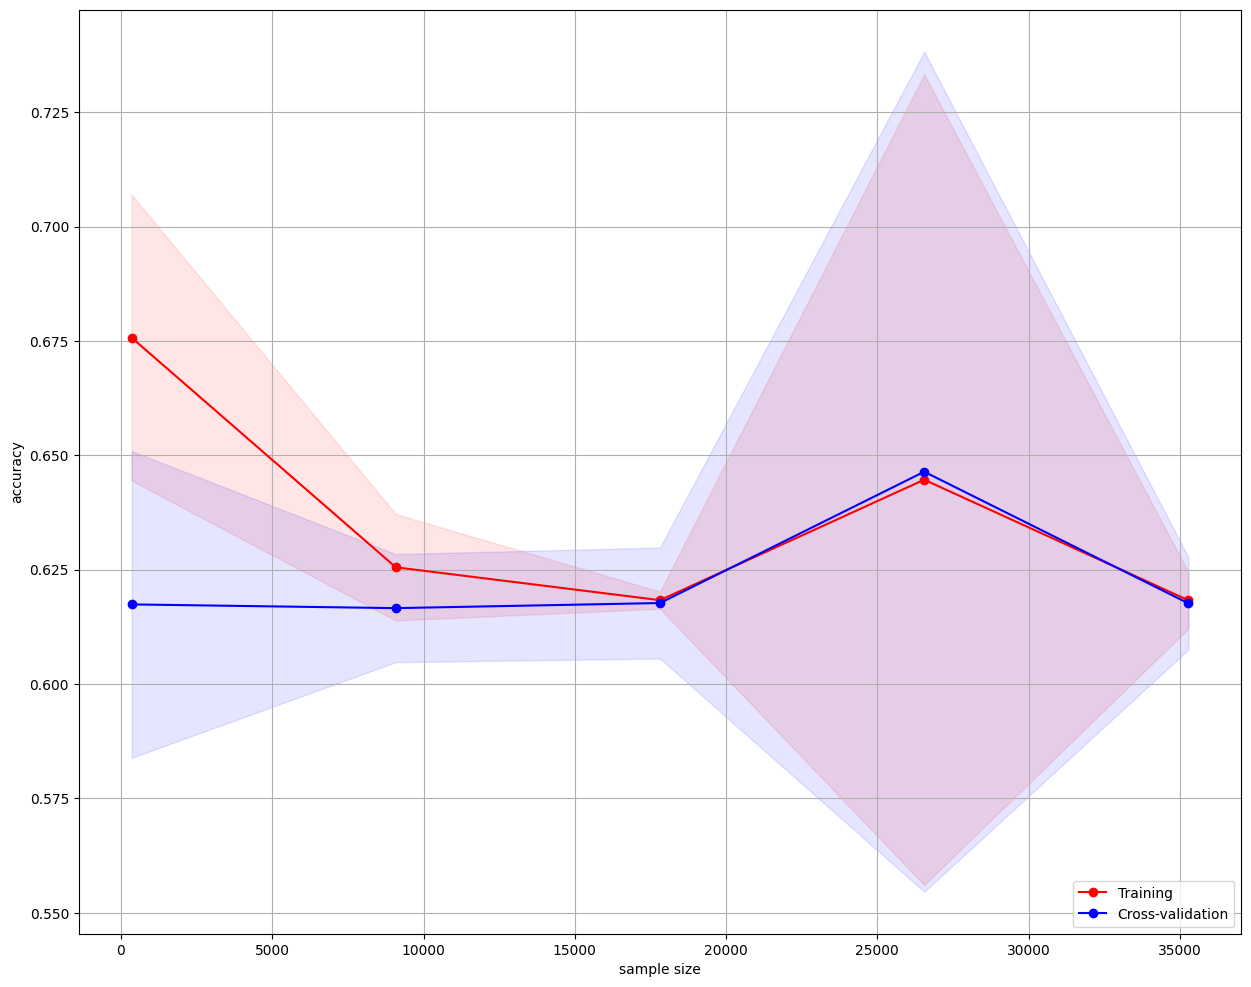

In [91]:
mean_train = np.mean(train_scores,axis=1)
upper_train = np.clip(mean_train + np.std(train_scores,axis=1),0,1)
lower_train = np.clip(mean_train - np.std(train_scores,axis=1),0,1)
mean_test = np.mean(test_scores,axis=1)
upper_test = np.clip(mean_test + np.std(test_scores,axis=1),0,1)
lower_test = np.clip(mean_test - np.std(test_scores,axis=1),0,1)
plt.plot(train_size,mean_train,'ro-',label='Training')
plt.fill_between(train_size,upper_train,lower_train,alpha=0.1,color='r')
plt.plot(train_size,mean_test,'bo-', label='Cross-validation')
plt.fill_between(train_size, upper_test, lower_test, alpha=0.1,color='b')
plt.grid()
plt.xlabel('sample size') # adds label to x axis
plt.ylabel('accuracy') # adds label to y axis
plt.legend(loc='lower right', numpoints= 1)
plt.show()

The model has a problem of **high Bias**. The **training score** and **test score** merged when sample size is greater than 18000. 

**Once again, working with just 'last_fico_range_high' field**:

In [94]:
penalty = {
    0: 12,
    1: 1
}

lr = LogisticRegression(C=10.0,penalty='l2',class_weight=penalty)
kf = KFold(n_splits= 10)

predictions = cross_val_predict(lr,features[['last_fico_range_high']],target,cv=kf) 

# Let's compute performance:
metrics = compute_metrics(predictions)
metrics

72.8063900810682
6.867256637168142

Other Mesurements:


,specificity,sensitivity,G-mean,precision,accuracy,False Positive Rate
values,93.13,72.81,82.34,98.44,75.74,6.87
